In [2]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

2023-05-05 12:40:55.925089: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 12:40:55.925105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


['/device:CPU:0']


2023-05-05 12:40:57.917436: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 12:40:58.040061: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-05 12:40:58.040448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-05 12:40:58.040574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such 

In [3]:
# !pip install -q fer
import tensorflow as tf
%env CUDA_VISIBLE_DEVICES=1
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

env: CUDA_VISIBLE_DEVICES=1


In [2]:
%matplotlib inline
from fer import Video
from fer import FER
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd

2023-10-20 13:40:11.545958: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/nali/.local/lib/python3.8/site-packages/cv2/../../lib64:
2023-10-20 13:40:11.545972: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [47]:
%matplotlib inline
from fer import Video
from fer import FER
import matplotlib.pyplot as plt
import os
import sys
# fn contains the video file name (Ensure that you only upload one file)
# videofile = './data/2022-01-25_manuela.n.jeyaraj@mytudublin.ie_face_B2.mp4'
# videofile = '/media/nali/Seagate Portable Drive/4_HRIStudy2_Conditions_groupby/53_face_A21_BA2_trim_onepersion_merged.mp4'
# videofile = '/media/nali/Seagate Portable Drive/4_HRIStudy2_Conditions_groupby/53_face_B1_BA2_trim.mp4'
# videofile = '/media/nali/Seagate Portable Drive/4_HRIStudy2_Conditions_groupby/53_face_A23_BA2_trim.mp4'
# videofile = '/media/nali/Seagate Portable Drive/9_oneperson/23_face_A13_BA1_trim.mp4'
videofile = '/media/nali/Seagate Portable Drive/9_oneperson/23_face_B1_BA1_trim.mp4'

# Face detection
detector = FER(mtcnn=True)
# Video predictions
video = Video(videofile)

# Output list of dictionaries
raw_data = video.analyze(detector, display=False)

INFO:fer:30.00 fps, 652 frames, 21.73 seconds
INFO:fer:Making directories at output
INFO:fer:Deleted pre-existing output/23_face_B1_BA1_trim_output.mp4
100%|█████████████████████████████████████| 652/652 [07:28<00:00,  1.45frames/s]
INFO:fer:Completed analysis: saved to output/23_face_B1_BA1_trim_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 7%
INFO:fer:Compressing: 15%
INFO:fer:Compressing: 23%
INFO:fer:Compressing: 30%
INFO:fer:Compressing: 38%
INFO:fer:Compressing: 46%
INFO:fer:Compressing: 53%
INFO:fer:Compressing: 61%
INFO:fer:Compressing: 69%
INFO:fer:Compressing: 76%
INFO:fer:Compressing: 84%
INFO:fer:Compressing: 92%
INFO:fer:Compressing: 99%
INFO:fer:Zip has finished


In [48]:
df = video.to_pandas(raw_data)
df = video.get_first_face(df)
df = video.get_emotions(df)

In [42]:
df_A1= df

In [46]:
df_A1.to_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A1.csv")

In [49]:
df_A1_B= df

In [53]:
df_A1_B.to_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A1_B.csv")

In [36]:
df_A2= df

In [37]:
df_A2.to_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A2.csv")

In [7]:
df_A2_B = df

In [38]:
df_A2_B.to_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A2_B.csv")

In [50]:
df_A1_B[['sad', 'happy', 'surprise', 'neutral']].head()

,sad,happy,surprise,neutral
0,0.29,0.0,0.0,0.51
1,0.29,0.0,0.0,0.52
2,0.45,0.0,0.0,0.48
3,0.46,0.0,0.0,0.50
4,0.38,0.0,0.0,0.58


## Time series Facial Emotion Visualization

In [3]:
df_A1= pd.read_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A1.csv")
df_A1_B =pd.read_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A1_B.csv")
df_A2= pd.read_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A2.csv")
df_A2_B = pd.read_csv("/home/nali/Develop/HRI/data/HRI_Study2_result_csv/facial_Emotion/one_person/A2_B.csv")

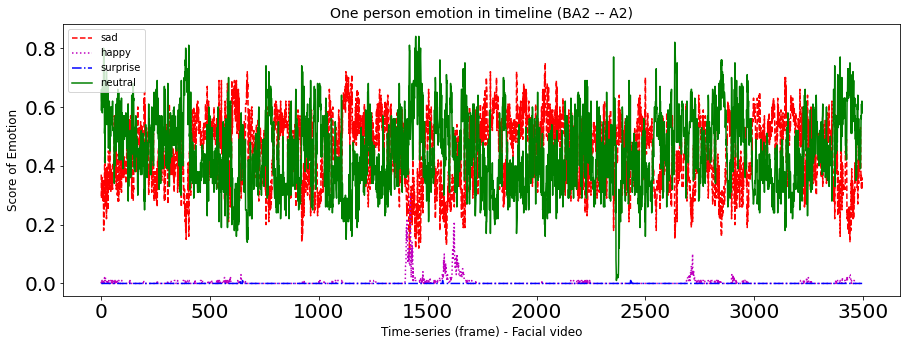

In [5]:
# Convert to pandas for analysis
# df = video.to_pandas(raw_data)
# df = video.get_first_face(df)
# df = video.get_emotions(df)

# Plot emotions
fig = df_A2[['sad', 'happy', 'surprise', 'neutral']].plot(figsize=(15, 5), fontsize=20,style=['r--', 'm:', 'b-.', 'g-']).get_figure()
plt.xlabel('Time-series (frame) - Facial video',fontsize=12)
# Set the y axis label of the current axis.
plt.ylabel('Score of Emotion',fontsize=12)
plt.legend(loc='upper left')
# Set a title of the current axes.
plt.title('One person emotion in timeline (BA2 -- A2)',fontsize=14)
# Filename for plot-
fig.savefig('New_onpersion_emotion_BA2_A2.jpg',bbox_inches='tight')

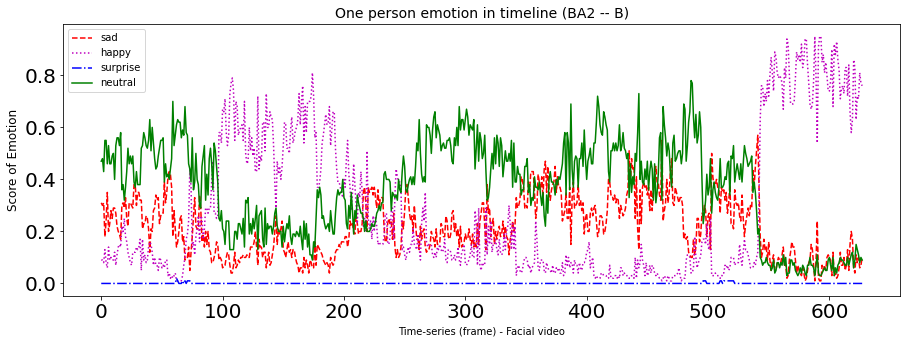

In [11]:
# Plot emotions
fig = df_A2_B[['sad', 'happy', 'surprise', 'neutral']].plot(figsize=(15, 5), fontsize=20,style=['r--', 'm:', 'b-.', 'g-']).get_figure()
plt.xlabel('Time-series (frame) - Facial video')
# Set the y axis label of the current axis.
plt.ylabel('Score of Emotion',fontsize=12)
plt.legend(loc='upper left')
# Set a title of the current axes.
plt.title('One person emotion in timeline (BA2 -- B)',fontsize=14)
# Filename for plot-
fig.savefig('New_onpersion_emotion_BA2_B.jpg',bbox_inches='tight')

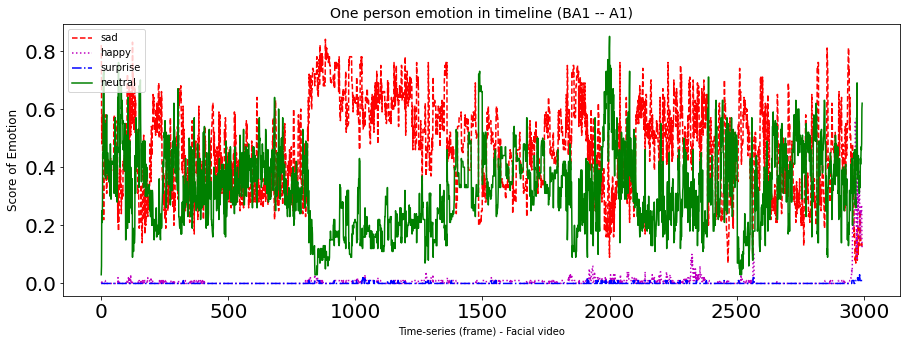

In [12]:
# Plot emotions
fig = df_A1[['sad', 'happy', 'surprise', 'neutral']].plot(figsize=(15, 5), fontsize=20, style=['r--', 'm:', 'b-.', 'g-']).get_figure()
plt.xlabel('Time-series (frame) - Facial video')
# Set the y axis label of the current axis.
plt.ylabel('Score of Emotion',fontsize=12)
plt.legend(loc='upper left')
# Set a title of the current axes.
plt.title('One person emotion in timeline (BA1 -- A1)',fontsize=14)
# Filename for plot-
fig.savefig('New_onpersion_emotion_BA1_A1.jpg',bbox_inches='tight')

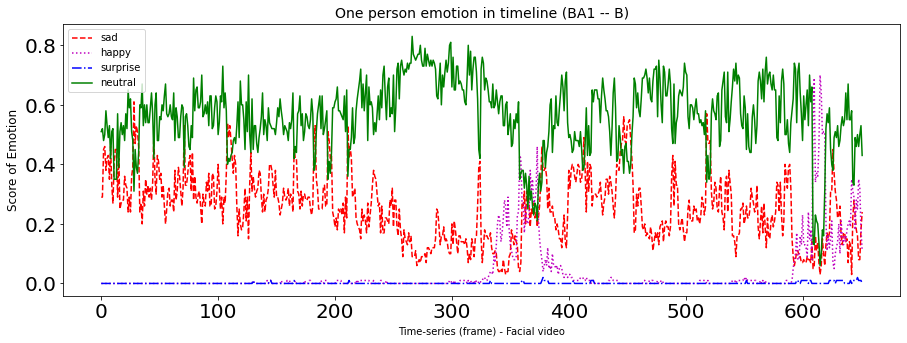

In [13]:
# Plot emotions
fig = df_A1_B[['sad', 'happy', 'surprise', 'neutral']].plot(figsize=(15, 5), fontsize=20, style=['r--', 'm:', 'b-.', 'g-']).get_figure()
plt.xlabel('Time-series (frame) - Facial video')
# Set the y axis label of the current axis.
plt.ylabel('Score of Emotion',fontsize=12)
plt.legend(loc='upper left')
# Set a title of the current axes.
plt.title('One person emotion in timeline (BA1 -- B)',fontsize=14)
# Filename for plot-
fig.savefig('New_onpersion_emotion_BA1_B.jpg', bbox_inches='tight')

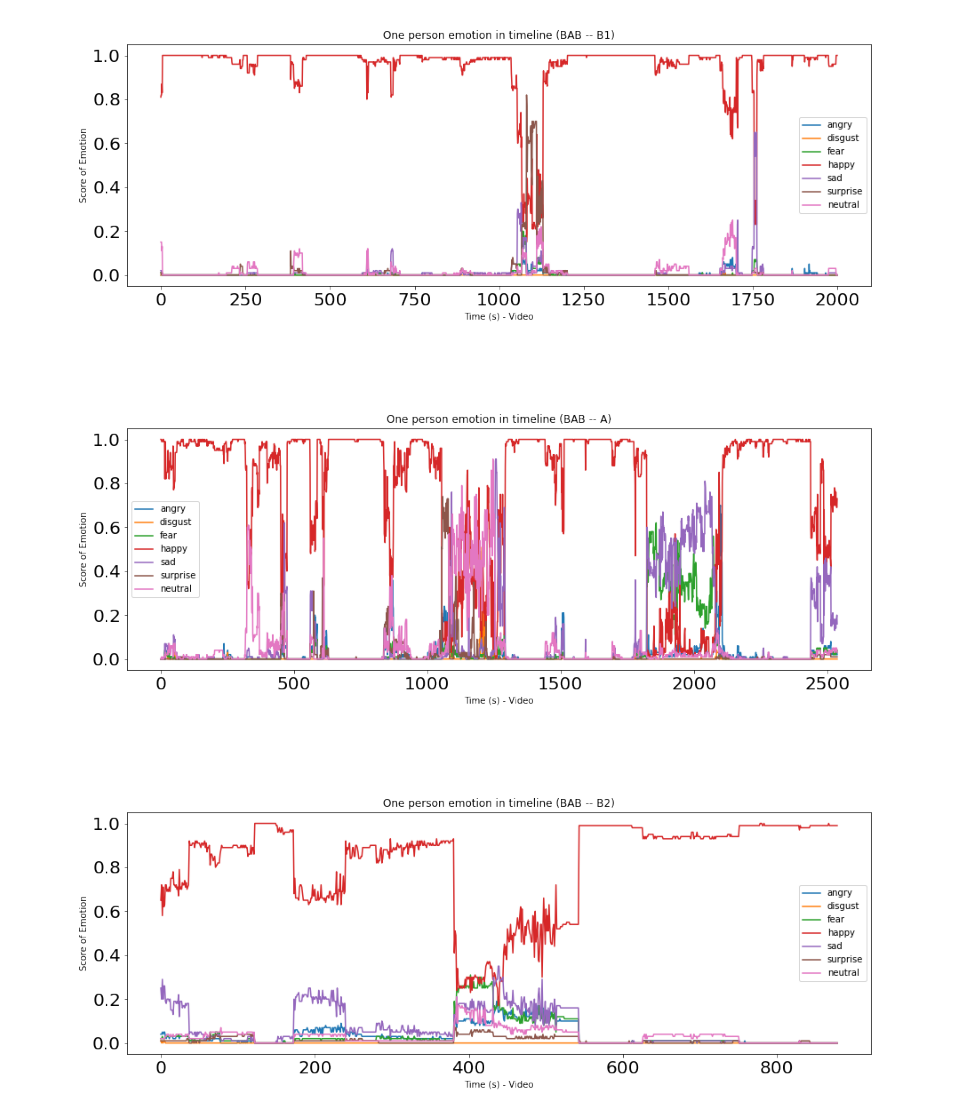

In [44]:
# code for displaying multiple images in one figure

#import libraries
import cv2
from matplotlib import pyplot as plt

# create figure
figBAB = plt.figure(figsize=(40,20))

# setting values to rows and column variables
rows = 3
columns = 1

# reading images
Image1 = plt.imread('New_emotion_B1.png')
Image2 = plt.imread('New_emotion_A.png')
Image3 = plt.imread('New_emotion_B2.png')

# Adds a subplot at the 1st position
figBAB.add_subplot(rows, columns, 1)

# showing image
plt.imshow(Image1)
plt.axis('off')
# plt.title("First")

# Adds a subplot at the 2nd position
figBAB.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
# plt.title("Second")

# Adds a subplot at the 3rd position
figBAB.add_subplot(rows, columns, 3)

# showing image
plt.imshow(Image3)
plt.axis('off')
# plt.title("Third")

# Adds a subplot at the 4th position
# fig.add_subplot(rows, columns, 4)

# showing image
# plt.imshow(Image4)
# plt.axis('off')
# plt.title("Fourth")
figBAB.savefig('New_emotion_BAB.png')